# ----------------------------- DATA CLEANING ----------------------------------

DataSets
https://drive.google.com/file/d/17CocX41hBN489lCkHaVuBE9vla0025xw/view?usp=share_link

# TRANSECTION DATASET 
Transaction dataset contain the all information of Transaction of a product such as transection id, product_id, customer_id, order status, price, product_first_sold_date etc. this dataset contain alot of missing values it our task to clean this dataset into meaning full dataset.

In [371]:
#Read data set
import pandas as pd  
import numpy as np   
import sklearn as sk  

DataSet =pd.read_csv('Transection.csv')
DataSet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  int64  
 1   product_id               20000 non-null  int64  
 2   customer_id              20000 non-null  int64  
 3   transaction_date         20000 non-null  object 
 4   online_order             19640 non-null  object 
 5   order_status             20000 non-null  object 
 6   brand                    19803 non-null  object 
 7   product_line             19803 non-null  object 
 8   product_class            19803 non-null  object 
 9   product_size             19803 non-null  object 
 10  list_price               20000 non-null  float64
 11  product_first_sold_date  19803 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 1.8+ MB


In [372]:
#print some starting rows of dataset
DataSet.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,product_first_sold_date
0,1,2,2950,25/02/2017,False,Approved,Solex,Standard,medium,medium,71.49,41245.0
1,2,3,3120,21/05/2017,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,41701.0
2,3,37,402,16/10/2017,False,Approved,OHM Cycles,Standard,low,medium,1793.43,36361.0
3,4,88,3135,31/08/2017,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,36145.0
4,5,78,787,01/10/2017,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,42226.0


In [373]:
DS=DataSet

In [374]:
DS.head(15)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,product_first_sold_date
0,1,2,2950,25/02/2017,False,Approved,Solex,Standard,medium,medium,71.49,41245.0
1,2,3,3120,21/05/2017,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,41701.0
2,3,37,402,16/10/2017,False,Approved,OHM Cycles,Standard,low,medium,1793.43,36361.0
3,4,88,3135,31/08/2017,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,36145.0
4,5,78,787,01/10/2017,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,42226.0
5,6,25,2339,08/03/2017,True,Approved,Giant Bicycles,Road,medium,medium,1538.99,39031.0
6,7,22,1542,21/04/2017,True,Approved,WeareA2B,Standard,medium,medium,60.34,34165.0
7,8,15,2459,15/07/2017,False,Approved,WeareA2B,Standard,medium,medium,1292.84,39915.0
8,9,67,1305,10/08/2017,False,Approved,Solex,Standard,medium,large,1071.23,33455.0
9,10,12,3262,30/08/2017,True,Approved,WeareA2B,Standard,medium,medium,1231.15,38216.0


In [375]:
#describe the dataset (retrive central tendancey of dataset )
DS.describe()

,transaction_id,product_id,customer_id,list_price,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,20000.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,1107.829449,38199.776549
std,5773.647028,30.75359,1011.951046,582.825242,2875.201110
min,1.000000,0.00000,1.000000,12.010000,33259.000000
25%,5000.750000,18.00000,857.750000,575.270000,35667.000000
50%,10000.500000,44.00000,1736.000000,1163.890000,38216.000000
75%,15000.250000,72.00000,2613.000000,1635.300000,40672.000000
max,20000.000000,100.00000,5034.000000,2091.470000,42710.000000


In [376]:
#Determine the null values of columns
DS.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
product_first_sold_date    197
dtype: int64

In [377]:
DS['online_order'].value_counts()

True     9829
False    9811
Name: online_order, dtype: int64

In [378]:
#convert true and false into 0 and 1
#True = 1
#False = 0

DS['online_order'].replace(
    {
        False: 0, True: 1
    },    
    inplace=True
)

DS['online_order'].value_counts()

1.0    9829
0.0    9811
Name: online_order, dtype: int64

In [379]:
#calculate Null value of online_order
DS['online_order'].isnull().sum()

360

In [380]:
#Count number of values 
DS['online_order'].value_counts()

1.0    9829
0.0    9811
Name: online_order, dtype: int64

In [381]:
DS.head(100)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,product_first_sold_date
0,1,2,2950,25/02/2017,0.0,Approved,Solex,Standard,medium,medium,71.49,41245.0
1,2,3,3120,21/05/2017,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,41701.0
2,3,37,402,16/10/2017,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,36361.0
3,4,88,3135,31/08/2017,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,36145.0
4,5,78,787,01/10/2017,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,1,1778,21/02/2017,0.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,40649.0
96,97,80,211,31/05/2017,1.0,Approved,OHM Cycles,Touring,low,medium,1073.07,38339.0
97,98,49,333,23/06/2017,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,37823.0
98,99,95,32,26/03/2017,0.0,Approved,Giant Bicycles,Standard,medium,large,569.56,37874.0


In [382]:
#fill the missing value of online_order column


"""
we use fillna method to fill missing value of online_order 
because as you can see that the online_order contain Nominal data and 
when we count the number of True/False value then the ratio of both True/False are approximately equal and 
when we analysis the data you can observe  that the most of false or True come in groups. 
So, I fill this value by fillna method. 
because When users don’t pass any value then fillna method fills the place with value in the Forward index
or Previous index based on the value passed in the method parameter.
I fill these places with forward index but you can also fill it backward index.

"""
DS['online_order']=DS['online_order'].fillna(method='ffill')

In [383]:
#to check the null value of online_order
DS['online_order'].isnull().sum()

0

In [384]:
DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  int64  
 1   product_id               20000 non-null  int64  
 2   customer_id              20000 non-null  int64  
 3   transaction_date         20000 non-null  object 
 4   online_order             20000 non-null  float64
 5   order_status             20000 non-null  object 
 6   brand                    19803 non-null  object 
 7   product_line             19803 non-null  object 
 8   product_class            19803 non-null  object 
 9   product_size             19803 non-null  object 
 10  list_price               20000 non-null  float64
 11  product_first_sold_date  19803 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 1.8+ MB


In [385]:
#count number of null value in brand column
DS['brand'].isnull().sum()

197

In [386]:
#Count the number of values of each category
DS['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [387]:

"""
Brand column have same condition as online_order column. 
So ,missing values that are present in brand also fill with ffillna Method.
"""

#fill Missing values
DS['brand']=DS['brand'].fillna(method='ffill')

In [388]:
#count null value after filling 
DS['brand'].isnull().sum()

0

In [389]:
DS['product_line'].isnull().sum()

197

In [390]:
DS['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [391]:
#fill missing value of product_line with backwords fillna method
DS['product_line']=DS['product_line'].fillna(method='bfill')

In [392]:
#After filling missing value count number of null
DS['product_line'].isnull().sum()

0

In [393]:
#count the number of null values of product_class
DS['product_class'].isnull().sum()

197

<AxesSubplot:>

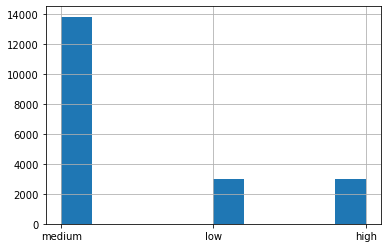

In [394]:
DS['product_class'].hist()

<AxesSubplot:>

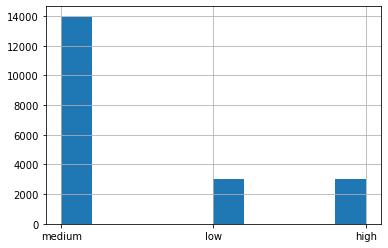

In [395]:
#fill missing value
DS['product_class']=DS['product_class'].fillna(method='bfill')
DS['product_class'].hist()


As you can see in above graphs before and after filling missing value of product_class column you can observe that there is no such difference between graphs. So, we can fill missing value with fillna method. 

In [396]:
#count missing value after applying fillna method 
DS['product_class'].isnull().sum()

0

In [397]:
DS['product_size'].isnull().sum()

197

In [398]:
DS['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

<AxesSubplot:>

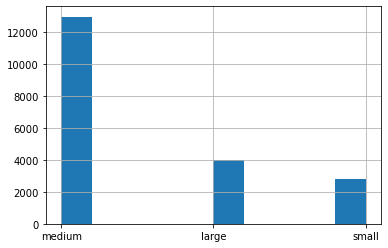

In [399]:
DS['product_size'].hist()

<AxesSubplot:>

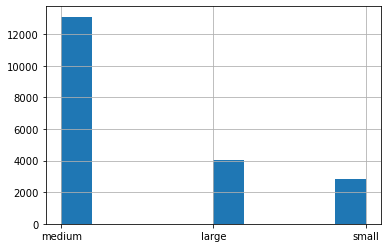

In [400]:
#fill misisng value
DS['product_size']=DS['product_size'].fillna(method='ffill')

#histogram after filling missing values
DS['product_size'].hist()


As you can see in above graphs before and after filling missing value of product_size column you can observe that there is no such difference between graphs. So, we can fill missing value with fillna method. 


In [401]:
#after filling missing value 
DS['product_size'].isnull().sum()

0

In [402]:
DS['product_first_sold_date'].isnull().sum()

197

In [404]:

"""
we can fill missing value of Product_first_sold_date by taking mean of entire column because
As you can see in dataset info that product_first_sold_date contain numerical data and
when we analysis the data of Product_first_sold_date, we observe that the in the starting the 
value of Product_first_sold_date is very high and in the end the value of Product_first_sold_date
is very low it means in the middle it contain average of both so, we fill missing value with mean of 
entire column

"""
DS['product_first_sold_date']=DS['product_first_sold_date'].fillna(DS['product_first_sold_date'].mean())

<BarContainer object of 20000 artists>

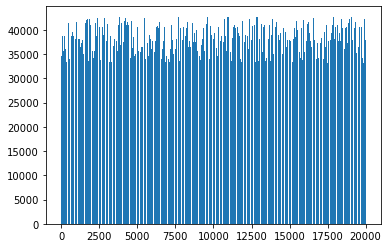

In [263]:
#After filling the missing value the graph of Product_first_sold_date column is given below.
import matplotlib.pyplot as plt

y=DS['product_first_sold_date']
x=DS['transaction_id']
plt.bar(x,y)


In [264]:
DS['product_first_sold_date'].isnull().sum()

0

DataSet is successfully Cleaned Now we can easy use this for predictions

In [265]:
#Now we check dataset contain any other null values or not

DS.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
product_first_sold_date    0
dtype: int64

As you can that there is no further Null values are present in dataset it means our dataset is now clean, Now we can use it for prediction or modeling.

# DATASET2 (Customer Demographic)
CustomerDemographic is a dataset contains the information of customer such as customer id, name, gender, DOB, job title, wealth_segment, owns_car etc.

In [279]:
#import libraries
import pandas as pd
import numpy as np

#read dataset
dataset2=pd.read_csv("CustomerDemographic.csv")

#retrieve rows of dataset
dataset2.head(10)


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,01-Feb,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
5,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,� � � �,Yes,13.0
6,7,Fina,Merali,Female,6,1976-02-23,NaN,Financial Services,Affluent Customer,N,������,Yes,11.0
7,8,Rod,Inder,Male,31,1962-03-30,Media Manager I,NaN,Mass Customer,N,(�°�°��︵ ���),No,7.0
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,0/0,Yes,8.0
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,��,Yes,20.0


In [280]:
DS2=dataset2
DS2.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,01-Feb,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [281]:
#retrieve the common information of dataset
DS2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

In [282]:
#retrieve contral tendency of dataset
DS2.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [283]:
#calculate the null value present in each columns
DS2.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [284]:


"""
we use fillna methods to fill missing value of last name of particular person 
because as you can see that the last_name contian string data.
we don't know about last name of particular person, hence for this we use random str in order to handle the missing values,
I fill this value by filna method because When users don’t pass any value then fillna method
fills the place with value in the Forward index or Previous index
based on the value passed in the method parameter.
we need to fill it, we can not drop the rows that contain missing values because these rows may be contain 
important data so, we can fill it with random string unless drop it.

"""
DS2['last_name']=DS2['last_name'].fillna(method='ffill')
DS2['last_name'].isnull().sum()

0

In [285]:
""" Condition of DOB is same as Condition of last_name so, we also fill null value of DOB column with fillna method  """
DS2['DOB']=DS2['DOB'].fillna(method='ffill')

#count the number of null values present in DOB column
DS2['DOB'].isnull().sum()

0

In [286]:
#count number of values
DS2['gender'].value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [287]:

#replace Femal, F to Female, and M to Male because it  is to understand or prediction
DS2['gender'].replace(
    {
        'F': 'Female', 'M': 'Male', 'Femal':'Female'
    }, 
    
    inplace=True
)


#count number of values
DS2['gender'].value_counts()

Female    2039
Male      1873
U           88
Name: gender, dtype: int64

In [288]:
DS2['job_title'].value_counts()


Business Systems Development Analyst    45
Social Worker                           44
Tax Accountant                          44
Internal Auditor                        42
Legal Assistant                         41
                                        ..
Database Administrator I                 4
Health Coach I                           3
Research Assistant III                   3
Health Coach III                         3
Developer I                              1
Name: job_title, Length: 195, dtype: int64

<AxesSubplot:>

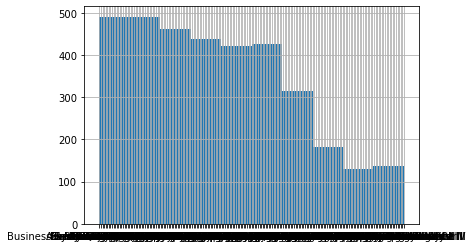

In [289]:
DS2['job_title'].hist()

<AxesSubplot:>

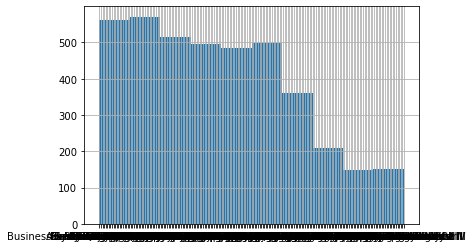

In [290]:

"""
As we can see in above histogram we can not able to assign a particular job to a particular person
So, we can check it with fillna method if their is no change occur in histogram, then we use fillna method
to fill fill the missing values

"""
DS2['job_title']=DS2['job_title'].fillna(method='bfill')
DS2['job_title'].hist()

As you can see in above histogram their is no certain change is occur in histogram after filling missing value with fillna method. so, it means we can fill it with fillna method, hence I used fillna method to fill the missing value.

In [291]:
DS2['job_industry_category']=DS2['job_industry_category'].fillna(method='ffill')

In [292]:


#we need to default column because it contain raw data or meaning less data.
del DS2['default']

In [293]:
DS2.isnull().sum()

customer_id                             0
first_name                              0
last_name                               0
gender                                  0
past_3_years_bike_related_purchases     0
DOB                                     0
job_title                               0
job_industry_category                   0
wealth_segment                          0
deceased_indicator                      0
owns_car                                0
tenure                                 87
dtype: int64

In [294]:
#count the values
DS2['tenure'].value_counts()

7.0     235
5.0     228
11.0    221
10.0    218
16.0    215
8.0     211
18.0    208
12.0    202
14.0    200
9.0     200
6.0     192
4.0     191
13.0    191
17.0    182
15.0    179
1.0     166
3.0     160
19.0    159
2.0     150
20.0     96
22.0     55
21.0     54
Name: tenure, dtype: int64

<AxesSubplot:>

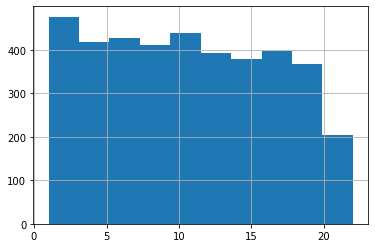

In [295]:
#display the histogram of tenure
DS2['tenure'].hist()

In [296]:
"""
As you can see in histogram of data, it contain value in decreasing order, 
but when you focus on histogram you can see that first it increase and then decrease. 
Hence, we use mean of column to fill the missing value   
"""

#fill missing value of tenure column
DS2['tenure']=DS2['tenure'].fillna(DS2['tenure'].mean())

<AxesSubplot:>

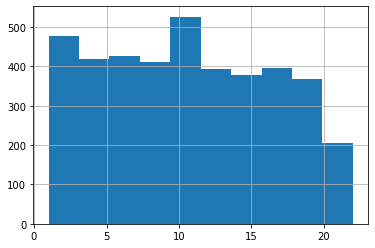

In [297]:
#Histogram after filling the missing value
DS2['tenure'].hist()

In [298]:
DS2.head(10)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,Dearle,Male,33,1961-10-03,Senior Editor,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,IT,Affluent Customer,N,Yes,8.0
5,6,Curr,Duckhouse,Male,35,1966-09-16,Media Manager I,Retail,High Net Worth,N,Yes,13.0
6,7,Fina,Merali,Female,6,1976-02-23,Media Manager I,Financial Services,Affluent Customer,N,Yes,11.0
7,8,Rod,Inder,Male,31,1962-03-30,Media Manager I,Financial Services,Mass Customer,N,No,7.0
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0


In [299]:
#Now we check dataset contain any other null values or not
DS2.isnull().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
dtype: int64

As you can that there is no further Null values are present in dataset it means our dataset is now clean, Now we can use it for prediction or modeling.

# DATASET 3 (MS)
MS dataset contain the information of house for selling or buying such as Rooms, Address, Bathroom, LandSize etc. This dataset contains missing values and raw data. we to perform data cleaning steps to clean the data.

In [417]:
import pandas as pd
import numpy as np


#Read Data 
dataset3=pd.read_csv("MS.csv")

dataset3.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,...,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,...,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,6/08/2016,2.5,3067.0,...,2.0,1.0,202.0,NaN,1900.0,Yarra City Council,-37.7996,144.9989,Northern Metropolitan,4019.0


In [418]:
#Display information about dataset
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [419]:
#Calculate the null values present in dataset
dataset3.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [413]:
#assign features and Label
X= dataset3.iloc[ :, :-1].values
Y= dataset3.iloc[:,-1].values


In [424]:
#Replace all missing values by Mean

#import Imputer 
from sklearn.impute import SimpleImputer


imp = SimpleImputer(missing_values=np.nan, strategy='mean')

#Assign Index of Columns that contain missing value 
numerical_Column = [4,10,11,12,13,14,15,17,18]

imp.fit(X[:,numerical_Column ])
X[:, numerical_Column] = imp.transform(X[:,numerical_Column])



In [428]:
#to check the missing values
print(X)


[['Abbotsford' '68 Studley St' 2 ... -37.8014 144.9958
  'Northern Metropolitan']
 ['Abbotsford' '85 Turner St' 2 ... -37.7996 144.9984
  'Northern Metropolitan']
 ['Abbotsford' '25 Bloomburg St' 2 ... -37.8079 144.9934
  'Northern Metropolitan']
 ...
 ['Yarraville' '147A Severn St' 2 ... -37.82286 144.87856
  'Western Metropolitan']
 ['Yarraville' '12/37 Stephen St' 3 ... -37.810634295599115
  145.00185113165432 'Western Metropolitan']
 ['Yarraville' '3 Tarrengower St' 2 ... -37.8181 144.89351
  'Western Metropolitan']]


In [429]:


#now we need to encode data into numeric
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [19])], remainder='passthrough')
X = np.array(ct.fit_transform(X))




# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)


In [430]:
#Rescalling the data 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()


X_train[:, [4]] = sc.fit_transform(X_train[:, [4]])
X_test[:, [4]] = sc.transform(X_test[:, [4]])

print(X_train)
print(X_test)


[[1.0 0.0 0.0 ... 'Manningham City Council' -37.76684 145.11309]
 [0.0 0.0 0.0 ... 'Boroondara City Council' -37.804 145.0553]
 [1.0 0.0 0.0 ... 'Whitehorse City Council' -37.83816 145.17783]
 ...
 [0.0 0.0 0.0 ... 'Boroondara City Council' -37.8263 145.0257]
 [0.0 0.0 0.0 ... 'Monash City Council' -37.8696 145.1111]
 [0.0 0.0 0.0 ... 'Boroondara City Council' -37.80467 145.10322]]
[[0.0 0.0 0.0 ... 'Glen Eira City Council' -37.90719 145.0546]
 [0.0 0.0 0.0 ... 'Maribyrnong City Council' -37.810634295599115
  145.00185113165432]
 [0.0 0.0 1.0 ... 'Yarra City Council' -37.810634295599115
  145.00185113165432]
 ...
 [1.0 0.0 0.0 ... 'Manningham City Council' -37.78547 145.14153]
 [0.0 0.0 0.0 ... 'Glen Eira City Council' -37.8937 145.0137]
 [1.0 0.0 0.0 ... 'Banyule City Council' -37.810634295599115
  145.00185113165432]]
